## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [23]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [24]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

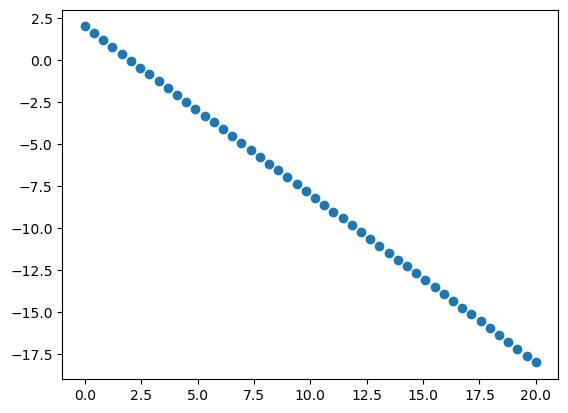

In [4]:
plt.scatter(X,y)

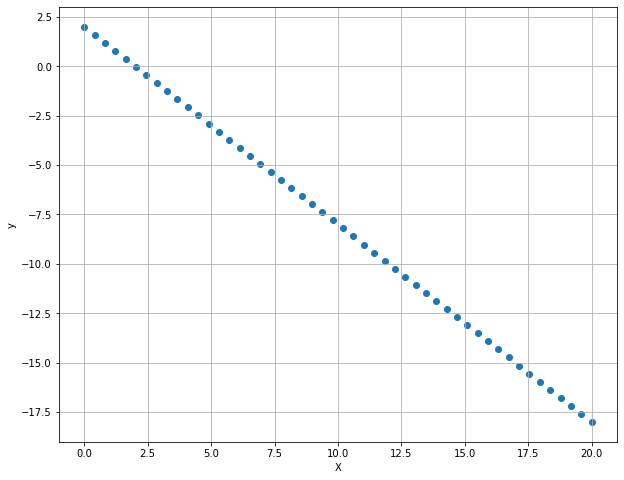

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [25]:

def batchGD(x,y,  alpha,max_iters):
    m=len(y)
    convergence_threshold=0.1
    theta_0=0
    theta_1=0
    theta_0_history=[]
    theta_1_history=[]
    loss=[]
    hypothesis_history=[]
    for i in range(max_iters+1):
        print("****************** Iteration ", i, "********************")
        # Step 2
        y_pred = theta_0 + theta_1 * x
        hypothesis_history.append(y_pred)
        error_vector = y_pred - y
        print("h(x):", y_pred)
        
        # Step 3
        
        error = y_pred - y
        mse = np.sum(error**2) / (2 * m)
        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)
        loss.append(mse)
        print("j=", mse)
        
        # Step 4
        gradient_theta_0 = (1 / m) * np.sum(error_vector)
        gradient_theta_1 = (1 / m) * np.dot(error_vector, X)
        gradient_vector=np.array([gradient_theta_0, gradient_theta_1])
       
        print("gradient_vector:", gradient_vector)
        
        gradient_norm = np.linalg.norm(gradient_vector)
        print("gradient_norm:", gradient_norm)
        
        if gradient_norm < convergence_threshold:  #gradient check
            print("Converged!")
            break 
        if (i > 0) and (abs(loss[-1] - loss[-2])) < 0.001:#cost check
            break

        # Step 5
        theta_0=theta_0 - alpha * gradient_vector[0]
        theta_1=theta_1 - alpha * gradient_vector[1]

       
        print("theta_0_new:", theta_0)
        print("theta_1_new:", theta_1)
    return {
        'theta_0_history': theta_0_history,
        'theta_1_history': theta_1_history,
        'loss': loss,
        'hypothesis_history': hypothesis_history,
        'optimal_theta_0': theta_0,
        'optimal_theta_1': theta_1
    }
        


In [28]:
test=batchGD(X,y,.0005,300)

****************** Iteration  0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
j= 49.34693877551021
gradient_vector: [  8.         114.69387755]
gradient_norm: 114.97254258164628
theta_0_new: -0.004
theta_1_new: -0.05734693877551021
****************** Iteration  1 ********************
h(x): [-0.004      -0.02740691 -0.05081383 -0.07422074 -0.09762766 -0.12103457
 -0.14444148 -0.1678484  -0.19125531 -0.21466222 -0.23806914 -0.26147605
 -0.28488297 -0.30828988 -0.33169679 -0.35510371 -0.37851062 -0.40191753
 -0.42532445 -0.44873136 -0.47213828 -0.49554519 -0.5189521  -0.54235902
 -0.56576593 -0.58917284 -0.61257976 -0.63598667 -0.65939359 -0.6828005
 -0.70620741 -0.72961433 -0.75302124 -0.77642815 -0.79983507 -0.82324198
 -0.8466489  -0.87005581 -0.89346272 -0.91686964 -0.94027655 -0.96368347
 -0.98709038 -1.01049729 -1.03390421 -1.05731112 -1.08071803 -1.

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

r2_score: 0.9686158031920962


In [29]:
from sklearn.metrics import r2_score

In [30]:
y_predict=test['optimal_theta_0']+test['optimal_theta_1']*X
r2_score(y,y_predict)

0.9686158031920962

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [31]:
def loss_plot(losses):
    plt.plot(losses, marker='*', markersize=5,color='m')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Epochs - Loss')
    plt.show()

In [32]:
def theta_plot(theta ,losses):
    plt.plot(theta,losses, marker='*', markersize=5,c='m')
    plt.xlabel('epoch')
    plt.ylabel("theta")
    plt.show()

In [33]:
def hypo_plot(H,x,y):
    plt.scatter(x,y)
    for i in H:
        plt.plot(x,i, color='red')
    plt.show()
    

In [34]:
def best_plot(y_hat,x,y):
    
    plt.scatter(x,y)
    plt.plot(x, y_hat, color='r')
    plt.title('X - Y - Line Predicted')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

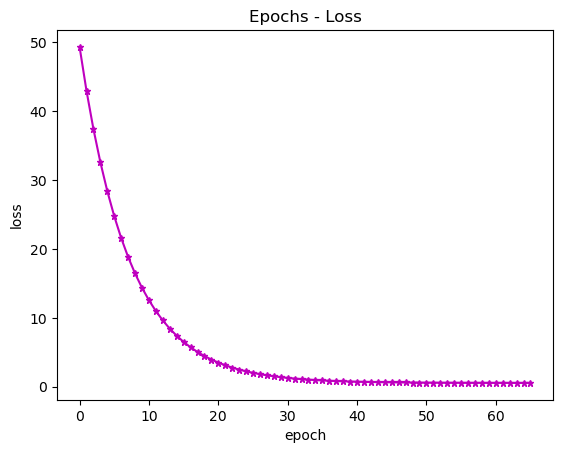

In [35]:
loss_plot(test['loss'])

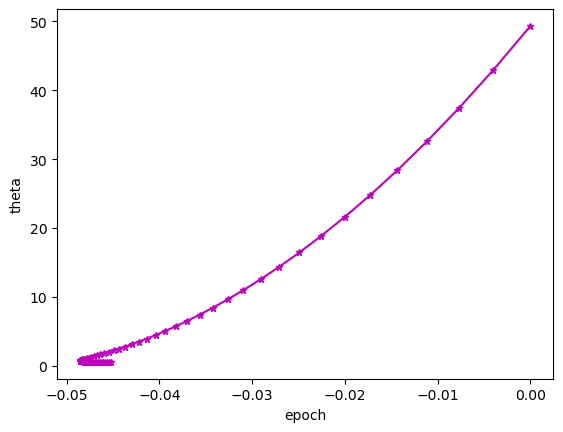

In [14]:
theta_plot(test['theta_0_history'],test['loss'])

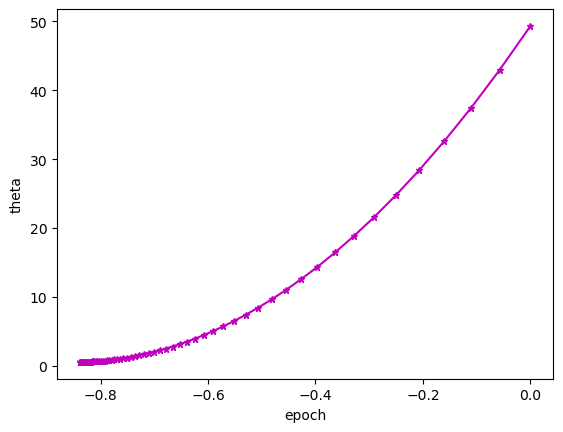

In [15]:
theta_plot(test['theta_1_history'],test['loss'])

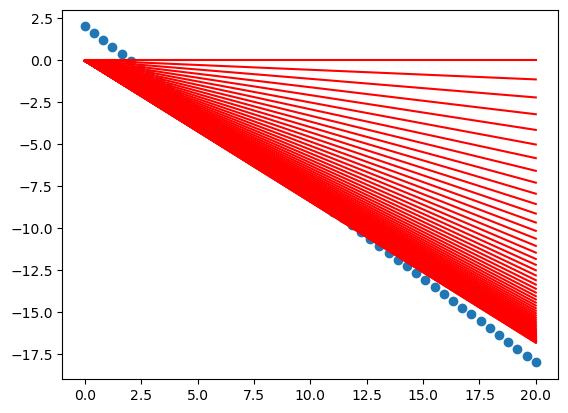

In [29]:
hypo_plot(test['hypothesis_history'],X,y)

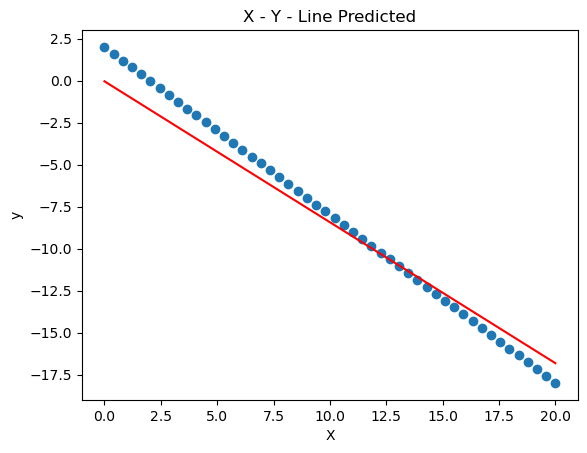

In [31]:
best_plot(y_predict,X,y)

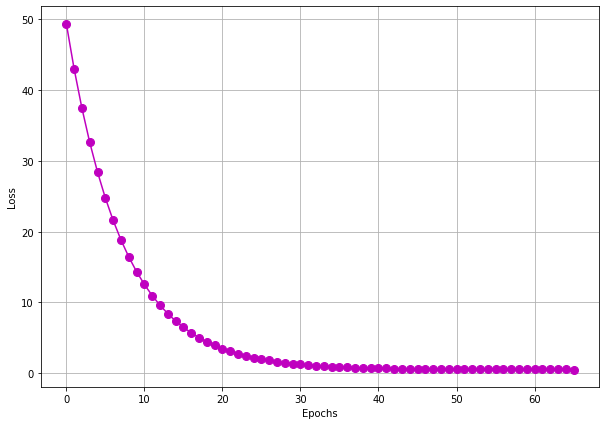

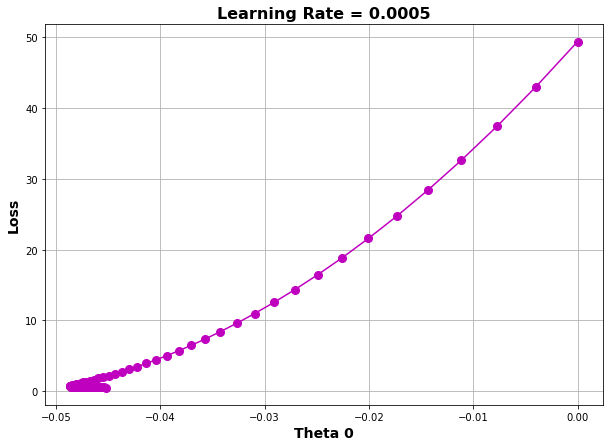

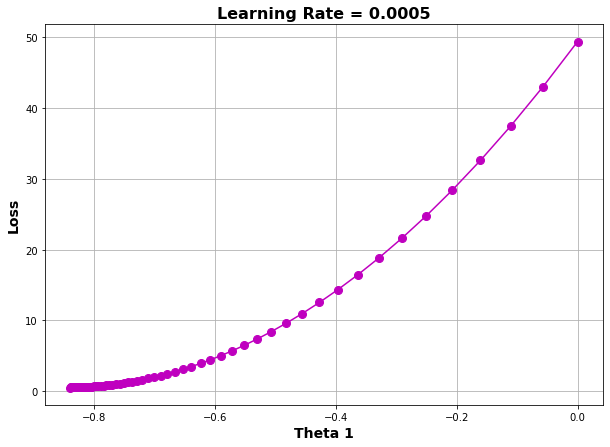

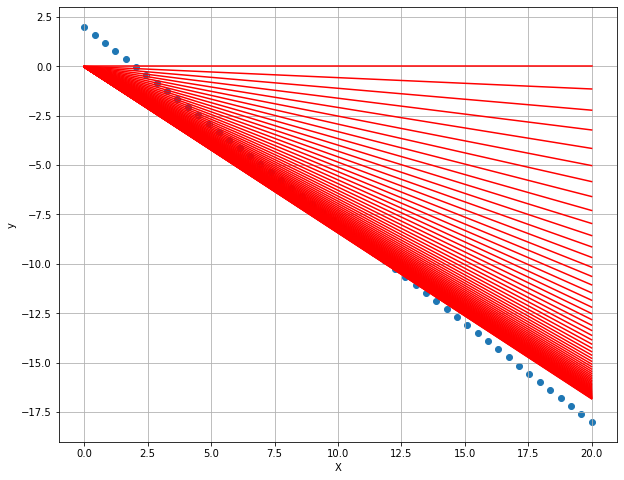

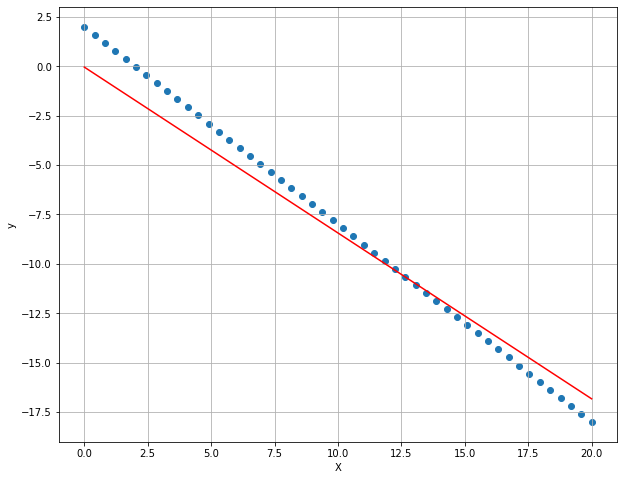

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [36]:
def Momentum_Based_GD(X,y, theta_0,theta_1, learn_rate, max_iters, threshold,convergence_check,gamma):
    
    cost=[]
    theta0_history=[]
    theta1_history=[]
    hypothesis=[]
    v_theta_0=0
    v_theta_1=0
    for i in range(max_iters):
        print(f"**** Iteration {i}")
        
        y_predict=theta_0 + theta_1 * X
        print('h(x):',y_predict)
        hypothesis.append(y_predict)
        
        theta0_history.append(theta_0) 
        theta1_history.append(theta_1)
        
        error=y_predict-y
        loss = (np.square(error).mean())
        print('Error Vector:\n',error,"\n")
        print('j =',loss,"\n")
        cost.append(loss)
        
        
        d_theta_0 = np.mean(error)
        d_theta_1 = np.mean((error) * X)
        Gradient_Vector = [[d_theta_0], [d_theta_1]]
        print('Gradient Vector :', Gradient_Vector, "\n")
        Gradient_Norm= np.linalg.norm(Gradient_Vector)
        print('Gradient Vector Norm :',Gradient_Norm, "\n")
        
        if (i > 0 and abs(cost[i-1] - cost[i]) < convergence_check):
            print("converged")
            break
          
        if Gradient_Norm < threshold:
            break
        
        
        v_theta_0=gamma*v_theta_0+learn_rate*d_theta_0
        v_theta_1=gamma*v_theta_1+learn_rate*d_theta_1
        
        print("v_theta_0 : ",v_theta_0,"\n" )
        print("v_theta_1 :",v_theta_1 ,"\n")     
        
        theta_0 =theta_0 -v_theta_0
        theta_1 =theta_1 -v_theta_1
        print("theta_0_new : ",theta_0,"\n" )
        print("theta_1_new :",theta_1 ,"\n")
        
        
    print("\n******* Training Report *******")
    print(f"Gradient Descent converged after {i+1} epochs")
    print("theta_0_Opt :",theta_0)
    print("theta_1_Opt :",theta_1)
    print("Cost = ",cost[-1])
    
    return theta_0,theta_1,loss,cost,theta0_history,theta1_history,hypothesis


In [37]:
#Momentum_Based_GD(X,y, theta_0,theta_1, learn_rate, max_iters, threshold,convergence_check,gamma):
theta_0,theta_1,loss,cost,theta0_history,theta1_history,hypothesis=Momentum_Based_GD(X,y,0,1,.0005,300,.1,0.01,0.5)

**** Iteration 0
h(x): [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
Error Vector:
 [-2.         -1.18367347 -0.36734694  0.44897959  1.26530612  2.08163265
  2.89795918  3.71428571  4.53061224  5.34693878  6.16326531  6.97959184
  7.79591837  8.6122449   9.42857143 10.24489796 11.06122449 11.87755102
 12.69387755 13.51020408 14.32653061 15.14285714 15.95918367 16.7755102
 17.59183673 18.40816327 19.2244898  20.04081633 20.85714286 2

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [38]:
y_predict=theta_0+theta_1*X
r2_score(y,y_predict)

0.9660290439501248

r2_score: 0.9687892837396442


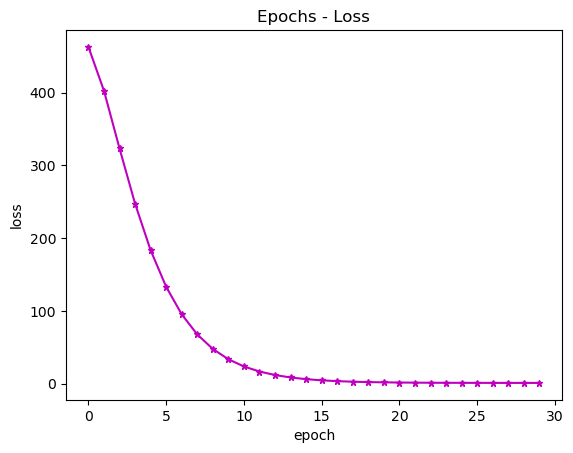

In [39]:
loss_plot(cost)

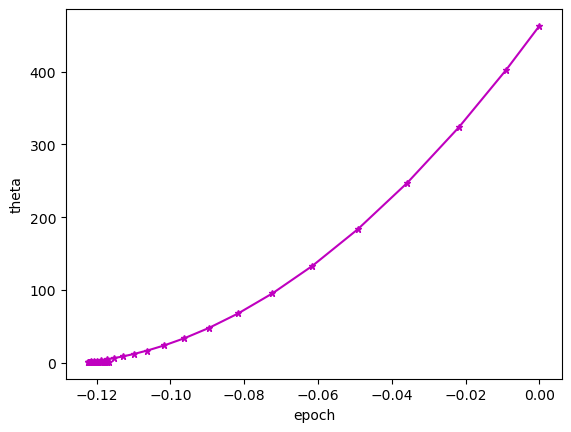

In [46]:
theta_plot(theta0_history,cost)

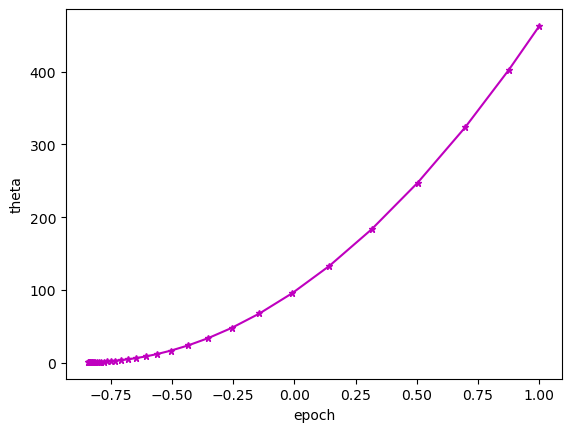

In [47]:
theta_plot(theta1_history,cost)

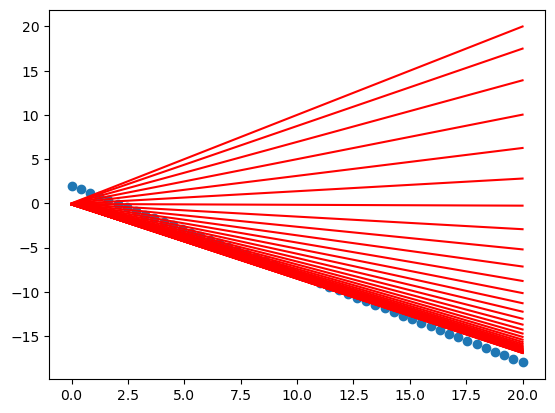

In [48]:
hypo_plot(hypothesis,X,y)

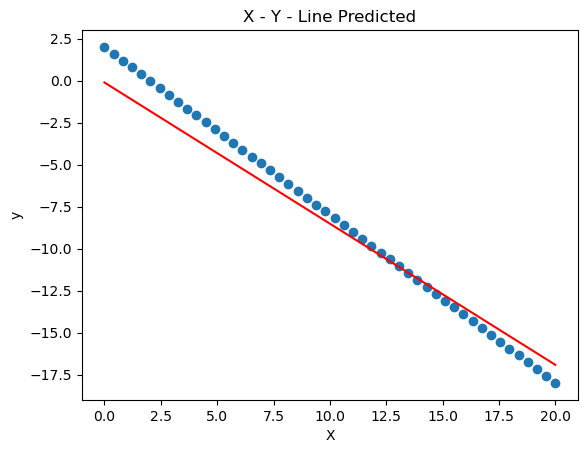

In [49]:
best_plot(y_predict,X,y)

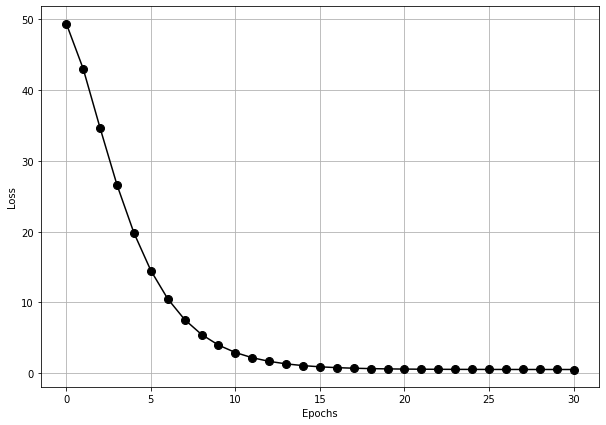

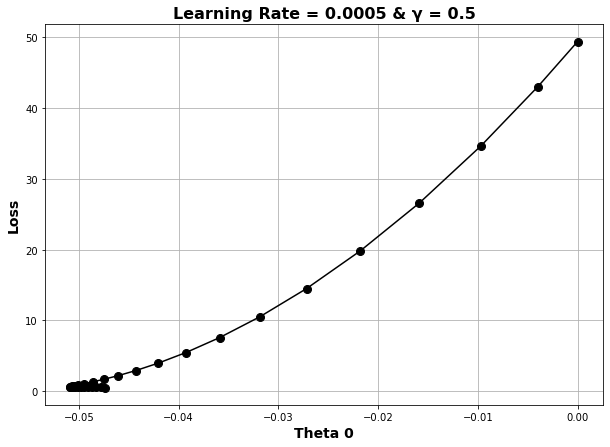

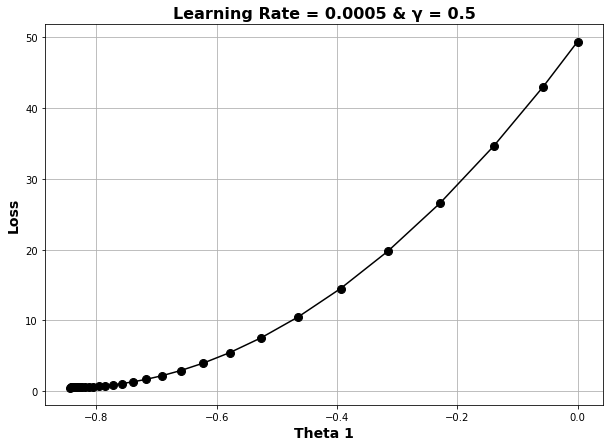

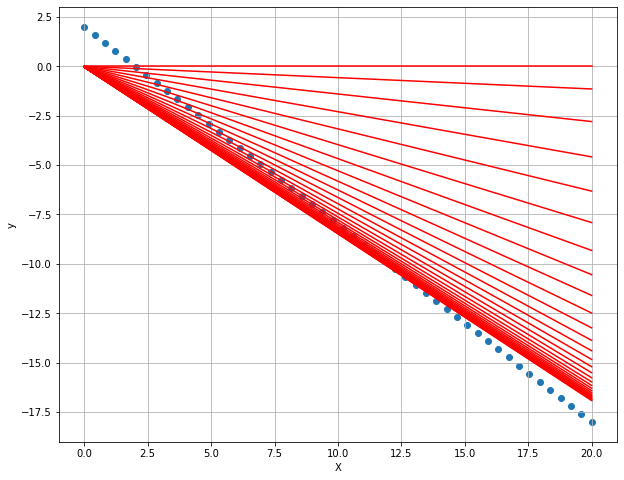

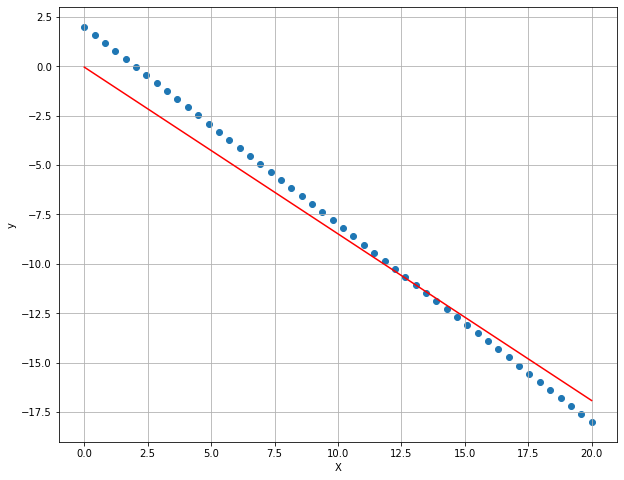

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [40]:
theta_0,theta_1,loss,cost,theta0_history,theta1_history,hypothesis=Momentum_Based_GD(X,y,0,1,.0005,300,.001,0.001,0)

**** Iteration 0
h(x): [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
Error Vector:
 [-2.         -1.18367347 -0.36734694  0.44897959  1.26530612  2.08163265
  2.89795918  3.71428571  4.53061224  5.34693878  6.16326531  6.97959184
  7.79591837  8.6122449   9.42857143 10.24489796 11.06122449 11.87755102
 12.69387755 13.51020408 14.32653061 15.14285714 15.95918367 16.7755102
 17.59183673 18.40816327 19.2244898  20.04081633 20.85714286 2

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [41]:
theta_0,theta_1,loss,cost,theta0_history,theta1_history,hypothesis=Momentum_Based_GD(X,y,0,1,.0005,300,.001,0.001,.9)

**** Iteration 0
h(x): [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
Error Vector:
 [-2.         -1.18367347 -0.36734694  0.44897959  1.26530612  2.08163265
  2.89795918  3.71428571  4.53061224  5.34693878  6.16326531  6.97959184
  7.79591837  8.6122449   9.42857143 10.24489796 11.06122449 11.87755102
 12.69387755 13.51020408 14.32653061 15.14285714 15.95918367 16.7755102
 17.59183673 18.40816327 19.2244898  20.04081633 20.85714286 2

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [42]:
y_predict=theta_0+theta_1*X
r2_score(y,y_predict)

0.9725107793454218

r2_score 0.973589591111118


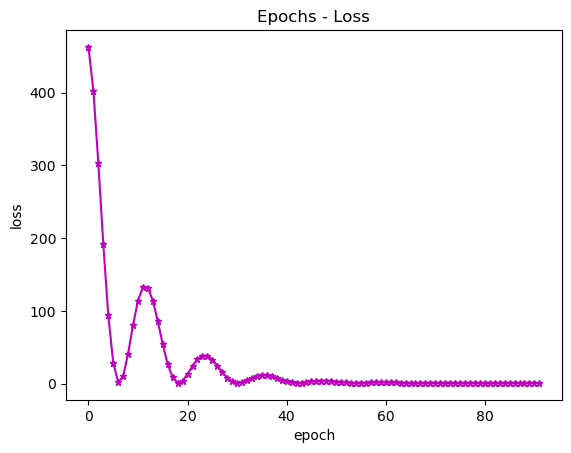

In [43]:
loss_plot(cost)

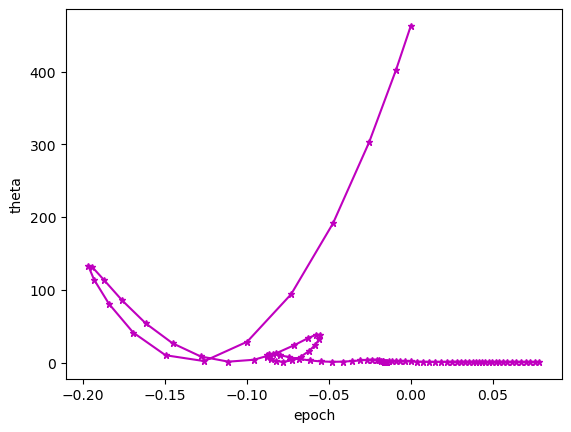

In [59]:
theta_plot(theta0_history,cost)

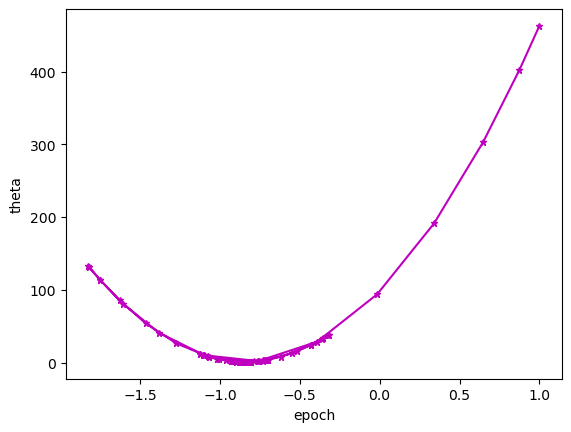

In [60]:
theta_plot(theta1_history,cost)

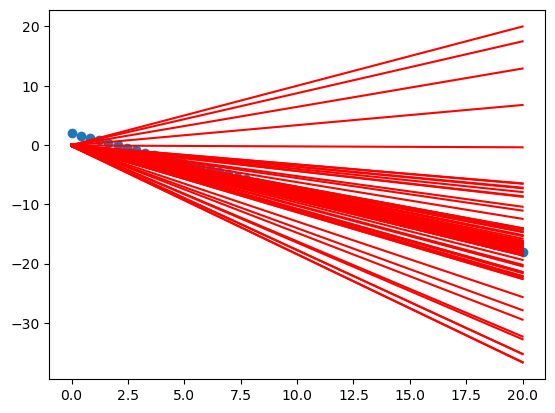

In [61]:
hypo_plot(hypothesis,X,y)

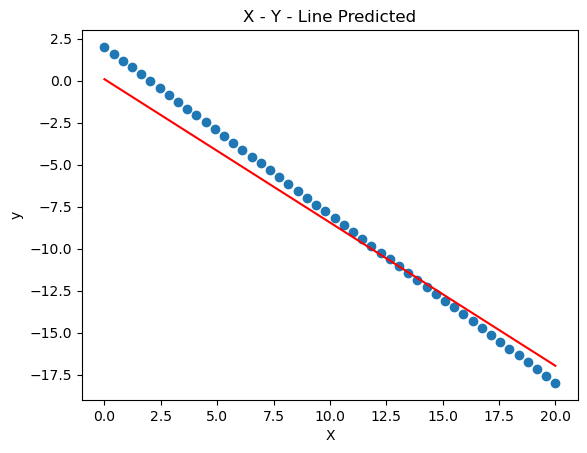

In [62]:
best_plot(y_predict,X,y)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [44]:
theta_0,theta_1,loss,cost,theta0_history,theta1_history,hypothesis=Momentum_Based_GD(X,y,0,1,.0005,300,.001,0.001,0.89)

**** Iteration 0
h(x): [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
Error Vector:
 [-2.         -1.18367347 -0.36734694  0.44897959  1.26530612  2.08163265
  2.89795918  3.71428571  4.53061224  5.34693878  6.16326531  6.97959184
  7.79591837  8.6122449   9.42857143 10.24489796 11.06122449 11.87755102
 12.69387755 13.51020408 14.32653061 15.14285714 15.95918367 16.7755102
 17.59183673 18.40816327 19.2244898  20.04081633 20.85714286 2

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [64]:
y_predict=theta_0+theta_1*X
r2_score(y,y_predict)

0.9712373253470192

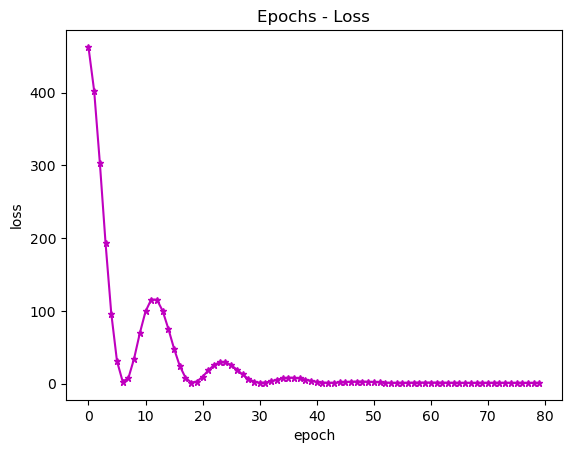

In [65]:
loss_plot(cost)

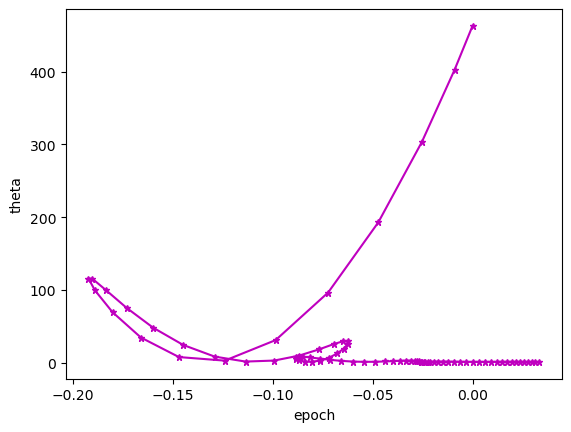

In [66]:
theta_plot(theta0_history,cost)

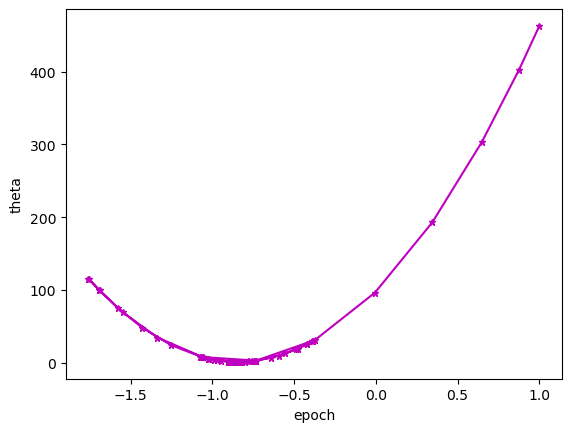

In [67]:
theta_plot(theta1_history,cost)

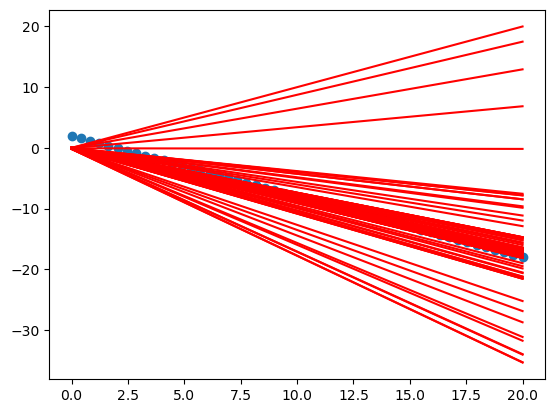

In [68]:
hypo_plot(hypothesis,X,y)

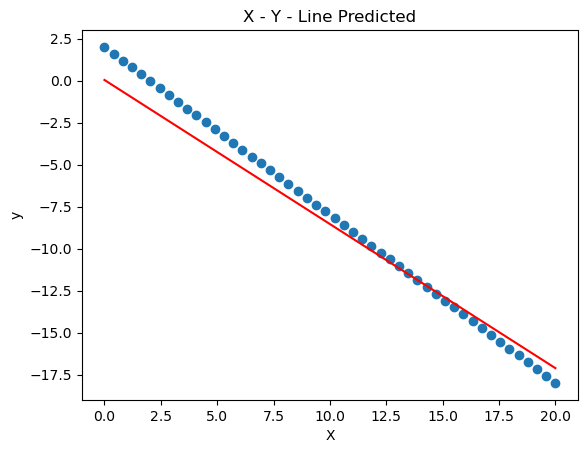

In [69]:
best_plot(y_predict,X,y)

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [59]:
def NAG(x, y, alpha, max_iters, gamma):
    m = len(y)
    convergence_threshold = 0.001
    theta_0 = 0
    theta_1 = 0
    theta_0_history = []
    theta_1_history = []
    loss = []
    hypothesis_history = []
    v_theta_0 = 0
    v_theta_1 = 0

    for i in range(max_iters + 1):
        print("****************** Iteration ", i, "********************")
        # Step 2
        y_pred = theta_0 + theta_1 * x
        hypothesis_history.append(y_pred)
        error_vector = y_pred - y
        print("h(x):", y_pred)

        # Step 3
        error = y_pred - y
        mse = np.sum(error ** 2) / (2 * m)
        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)
        loss.append(mse)
        print("j=", mse)

        # Step 4
        gradient_theta_0 = (1 / m) * np.sum(error_vector)
        gradient_theta_1 = (1 / m) * np.dot(error_vector, x)
        gradient_vector = np.array([gradient_theta_0, gradient_theta_1])
        print("gradient_vector:", gradient_vector)

        gradient_norm = np.linalg.norm(gradient_vector)
        print("gradient_norm:", gradient_norm)

        if gradient_norm < convergence_threshold:  # gradient check
            print("Converged!")
            break
        if (i > 0) and (abs(loss[-1] - loss[-2])) < 0.001:  # cost check
            break

        theta0_temp = theta_0 - gamma * v_theta_0
        theta1_temp = theta_1 - gamma * v_theta_1

        y_pred_temp = theta0_temp + theta1_temp * x
        error_temp = y_pred_temp - y

        g_theta0_temp = (1 / m) * np.sum(error_temp)
        g_theta1_temp = (1 / m) * np.dot(error_temp, x)
        


        
        v_theta_0 = gamma * v_theta_0 + alpha * g_theta0_temp
        v_theta_1 = gamma * v_theta_1 + alpha * g_theta1_temp
        
        theta_0=theta0_temp - alpha *g_theta0_temp
        theta_1=theta1_temp - alpha *g_theta1_temp



        print("theta_0_new:", theta_0)
        print("theta_1_new:", theta_1)

    return {
        'theta_0_history': theta_0_history,
        'theta_1_history': theta_1_history,
        'loss': loss,
        'hypothesis_history': hypothesis_history,
        'optimal_theta_0': theta_0,
        'optimal_theta_1': theta_1
    }

In [46]:
test=NAG(X, y, .0005, 300, .9)

****************** Iteration  0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
j= 49.34693877551021
gradient_vector: [  8.         114.69387755]
gradient_norm: 114.97254258164628
theta_0_new: -0.004
theta_1_new: -0.05734693877551021
****************** Iteration  1 ********************
h(x): [-0.004      -0.02740691 -0.05081383 -0.07422074 -0.09762766 -0.12103457
 -0.14444148 -0.1678484  -0.19125531 -0.21466222 -0.23806914 -0.26147605
 -0.28488297 -0.30828988 -0.33169679 -0.35510371 -0.37851062 -0.40191753
 -0.42532445 -0.44873136 -0.47213828 -0.49554519 -0.5189521  -0.54235902
 -0.56576593 -0.58917284 -0.61257976 -0.63598667 -0.65939359 -0.6828005
 -0.70620741 -0.72961433 -0.75302124 -0.77642815 -0.79983507 -0.82324198
 -0.8466489  -0.87005581 -0.89346272 -0.91686964 -0.94027655 -0.96368347
 -0.98709038 -1.01049729 -1.03390421 -1.05731112 -1.08071803 -1.

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [47]:
y_predict=test['optimal_theta_0']+test['optimal_theta_1']*X
r2_score(y,y_predict)

0.971103130756324

r2_score 0.971103130756324


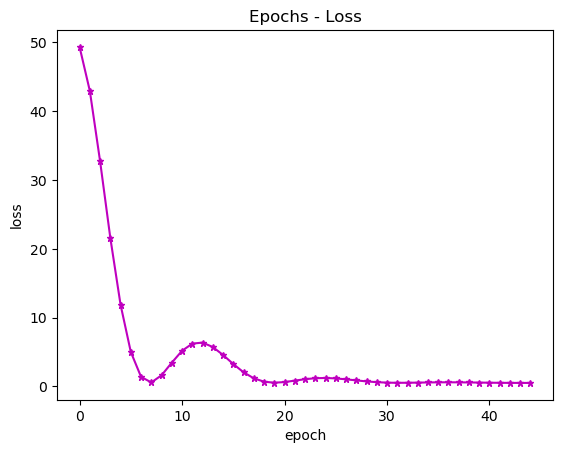

In [48]:
loss_plot(test['loss'])

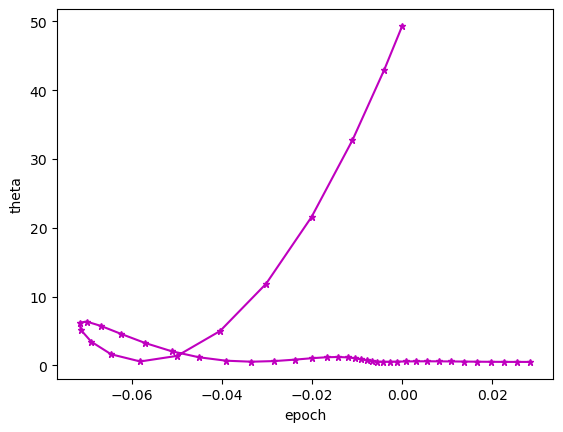

In [49]:
theta_plot(test['theta_0_history'],test['loss'])

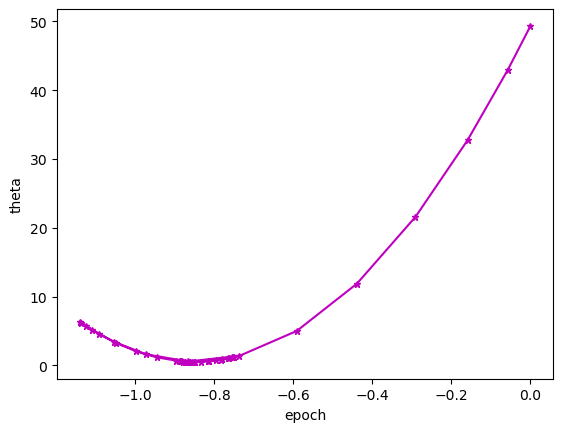

In [50]:
theta_plot(test['theta_1_history'],test['loss'])

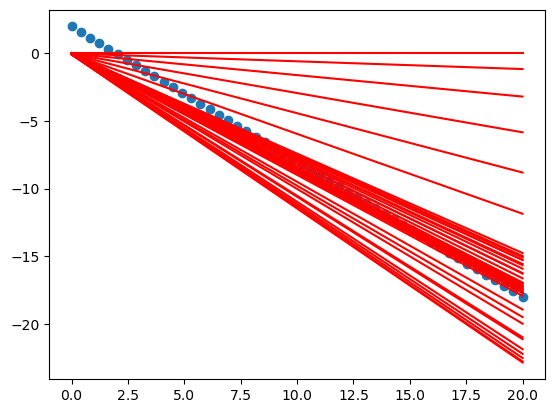

In [33]:
hypo_plot(test['hypothesis_history'],X,y)

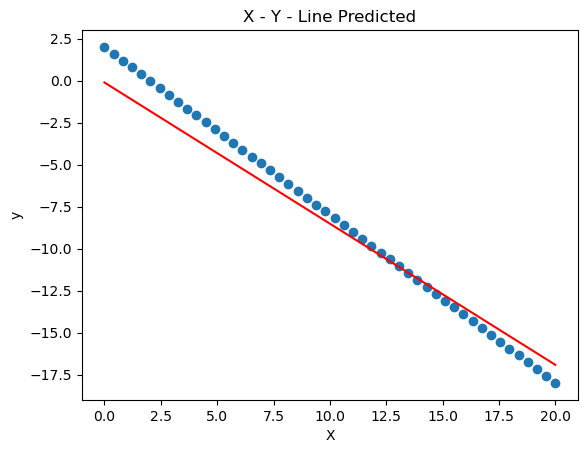

In [34]:
best_plot(y_predict,X,y)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [53]:
tset=NAG(X, y, .0005, 300, .89)

****************** Iteration  0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
j= 49.34693877551021
gradient_vector: [  8.         114.69387755]
gradient_norm: 114.97254258164628
theta_0_new: -0.004
theta_1_new: -0.05734693877551021
****************** Iteration  1 ********************
h(x): [-0.004      -0.02740691 -0.05081383 -0.07422074 -0.09762766 -0.12103457
 -0.14444148 -0.1678484  -0.19125531 -0.21466222 -0.23806914 -0.26147605
 -0.28488297 -0.30828988 -0.33169679 -0.35510371 -0.37851062 -0.40191753
 -0.42532445 -0.44873136 -0.47213828 -0.49554519 -0.5189521  -0.54235902
 -0.56576593 -0.58917284 -0.61257976 -0.63598667 -0.65939359 -0.6828005
 -0.70620741 -0.72961433 -0.75302124 -0.77642815 -0.79983507 -0.82324198
 -0.8466489  -0.87005581 -0.89346272 -0.91686964 -0.94027655 -0.96368347
 -0.98709038 -1.01049729 -1.03390421 -1.05731112 -1.08071803 -1.

In [52]:
y_predict=theta_0+theta_1*X
r2_score(y,y_predict)

0.9712373253470192

r2 score =  0.9699718983158406


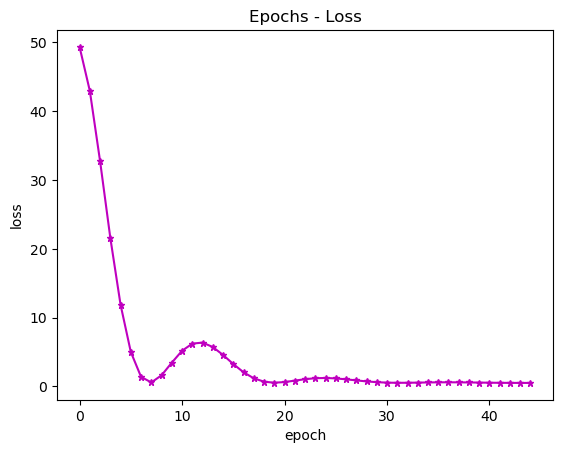

In [54]:
loss_plot(test['loss'])

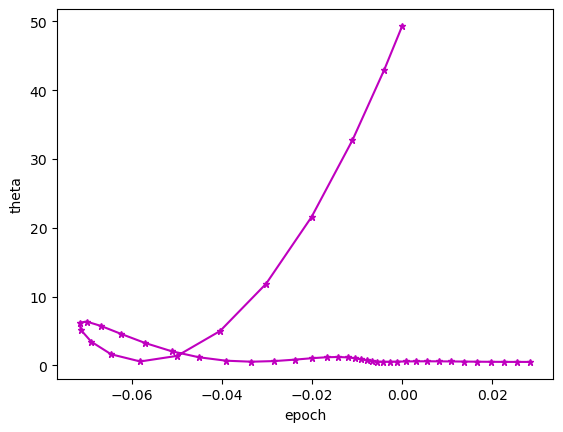

In [55]:
theta_plot(test['theta_0_history'],test['loss'])

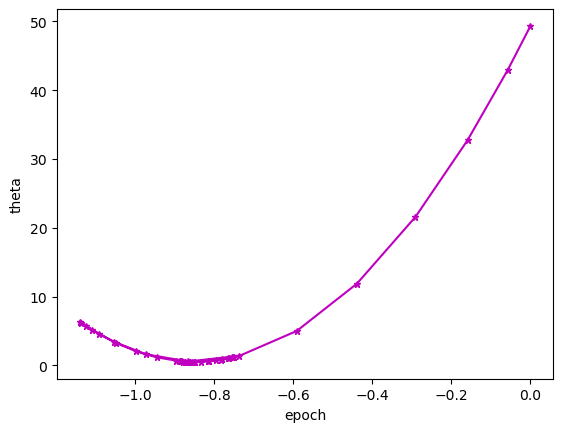

In [56]:
theta_plot(test['theta_1_history'],test['loss'])

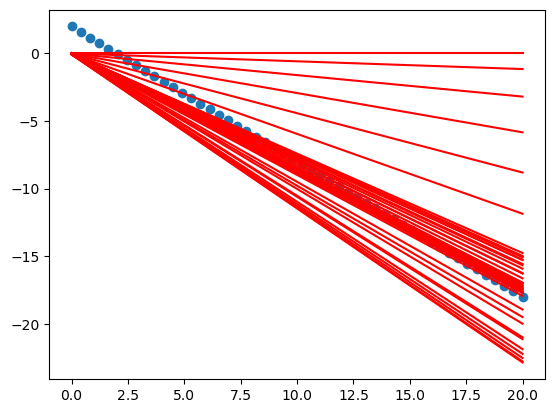

In [57]:
hypo_plot(test['hypothesis_history'],X,y)

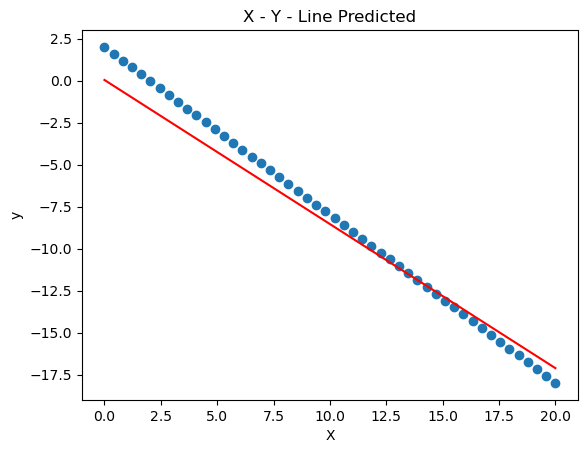

In [58]:
best_plot(y_predict,X,y)

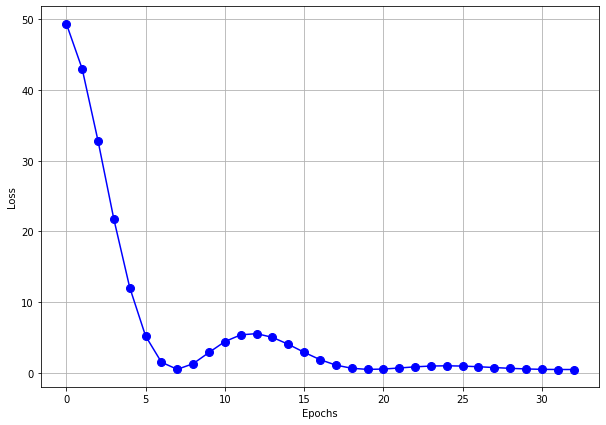

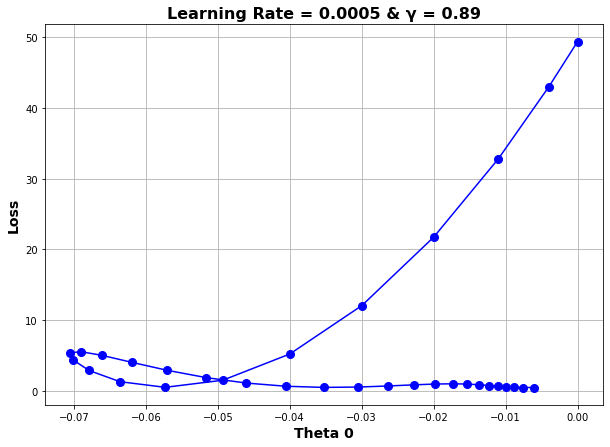

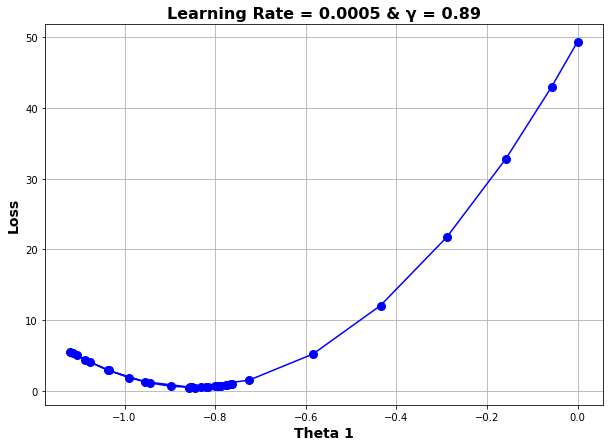

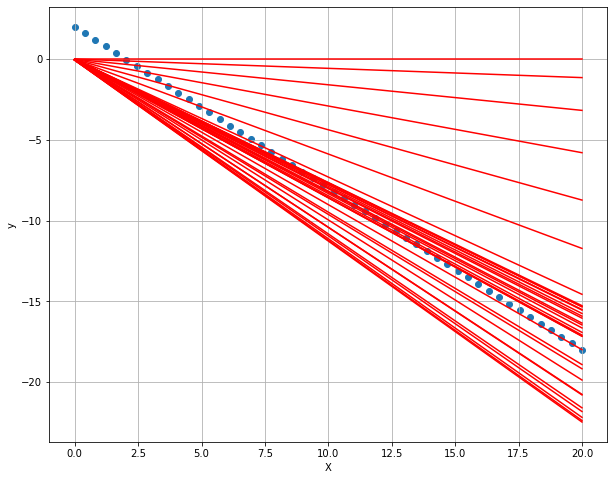

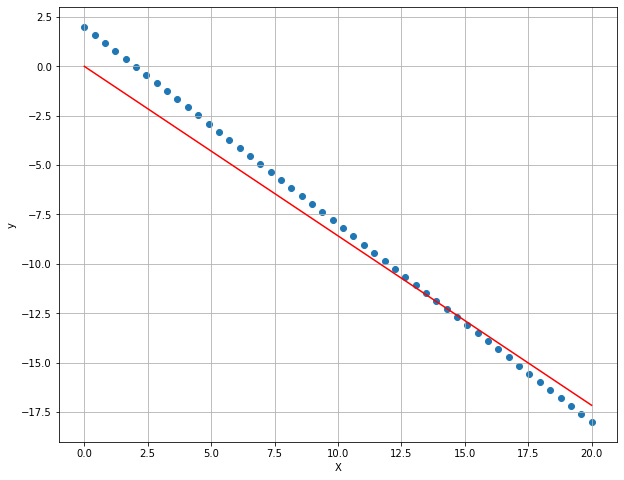